<a href="https://colab.research.google.com/github/MohammedAffanSakhib/FMML_Project_and_Labs/blob/main/AIML_Module_01_Lab_01_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracting features from data

Module 1, Lab 1<br>



In [22]:
! pip install wikipedia

import nltk
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import re

# Part 1: Features of text
How do we apply machine learning on text? We can't directly use the text as input to our algorithms. We need to convert them to features. In this notebook, we will explore a simple way of converting text to features.

Let us download a few documents off Wikipedia.

In [23]:
# Hindi passages (translated excerpts)
hindi1 = """यह सबसे अच्छा समय था, यह सबसे बुरा समय था, यह बुद्धिमत्ता का युग था, यह मूर्खता का युग था।"""
hindi2 = """मुझे इश्माएल कहो। कुछ साल पहले, जब मेरी जेब में पैसा नहीं था, मैंने समुद्र में यात्रा करने का निर्णय लिया।"""

# Arabic passages (translated excerpts)
arabic1 = """لقد كان أفضل الأوقات، كان أسوأ الأوقات، كان عصر الحكمة، كان عصر الحماقة."""
arabic2 = """نادني إسماعيل. منذ سنوات، عندما لم يكن لدي أموال، قررت أن أبحر في البحر وأرى العالم المائي."""


This is what the text looks like:

In [24]:
fr1


'lagirafegiraffacamelopardalisestuneespcedemammifresongulsartiodactylesdugroupedesruminantsvivantdanslessavanesafricainesetrpanduedutchadjusquenafriquedusudsonnomcommunvientdelarabezarfahmaislanimalfutanciennementappelcamloparddulatincameloparduscontractiondecameluschameauenraisondulongcouetdeparduslopardenraisondestachesrecouvrantsoncorpsaprsdesmillionsdannesdvolutionlagirafeaacquisuneanatomieuniqueavecuncouparticulirementallongquiluipermetnotammentdebrouterhautdanslesarbresneufpopulationssediffrenciantparleursrobesetformesonttdcritesparlesnaturalistesdepuislexixesicleparfoiscommeespcespartentiremaisgnralementconsidrescommesimplessousespcesjusquauxxiesiclecependantlataxonomiedesgirafesestactuellementdbattueparmilesscientifiqueslespceestconsidrecommevulnrableparluicnilyavaitindividusenetilnyenaplusqueensoitunediminutionapprochantenanstymologielesubstantiffminingirafeestunempruntlitaliengiraffaluimmeempruntlarabezurfapourlarabeclassiquezarfadescriptionilsagitdelanimalactuelleplusgranden

We need to clean this up a bit. Let us remove all the special characters and keep only 26 letters and space. Note that this will remove accented characters in French also. We are also removing all the numbers and spaces. So this is not an ideal solution.

In [26]:
def cleanup(text):
    text = text.lower()  # make it lowercase
    text = re.sub(r'[^a-zأ-ي\u0900-\u097F]+', '', text)  # Keep only valid characters (English, Arabic, Hindi)
    return text


In [27]:
hindi1 = cleanup(hindi1)
hindi2 = cleanup(hindi2)
arabic1 = cleanup(arabic1)
arabic2 = cleanup(arabic2)


In [25]:
print(arabic1)

لقد كان أفضل الأوقات، كان أسوأ الأوقات، كان عصر الحكمة، كان عصر الحماقة.


Now let us calculate the frequency of the character n-grams. N-grams are groups of characters of size n. A unigram is a single character and a bigram is a group of two characters and so on.

Let us count the frequency of each character in a text and plot it in a histogram.

In [28]:
# Convert tuples to strings
def tuple2string(tup):
    return ''.join(tup)

def key2string(keys):
    return [tuple2string(i) for i in keys]

# Plot histogram
def plothistogram(ngram, title):
    keys = key2string(ngram.keys())
    values = list(ngram.values())

    # Sort keys alphabetically
    combined = sorted(zip(keys, values), key=lambda x: x[0])
    keys, values = zip(*combined)

    plt.bar(keys, values)
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

Let us compare the histograms of English pages and French pages. Can you spot a difference?

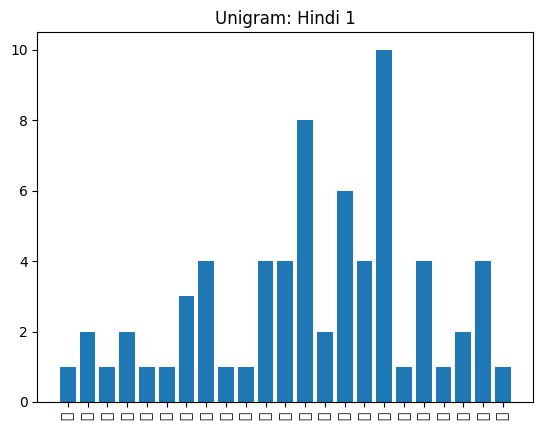

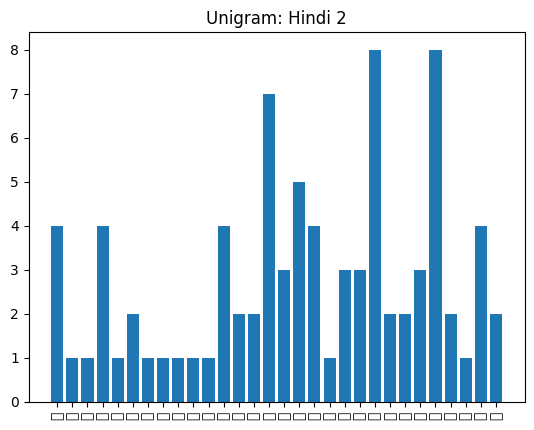

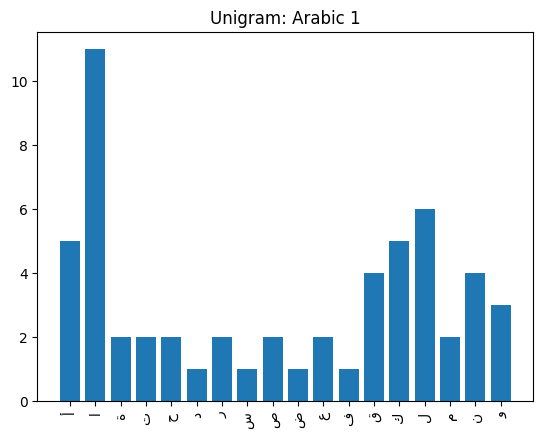

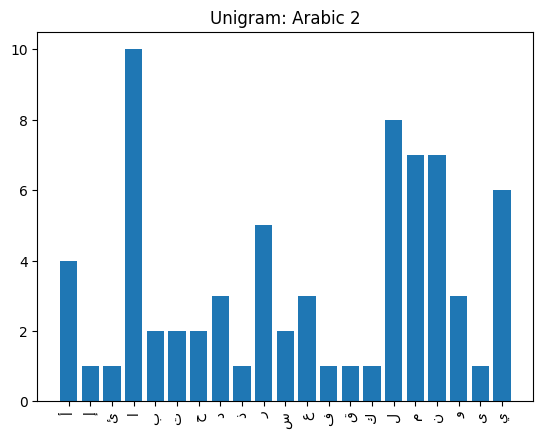

In [30]:
def analyze_and_plot_ngrams(text, n, title):
    # Generate n-grams
    ngram_counter = Counter(ngrams(text, n))
    # Plot the histogram
    plothistogram(ngram_counter, title)

# Analyze and plot unigrams for all texts
texts = [
    (hindi1, "Unigram: Hindi 1"),
    (hindi2, "Unigram: Hindi 2"),
    (arabic1, "Unigram: Arabic 1"),
    (arabic2, "Unigram: Arabic 2")
]

for text, title in texts:
    analyze_and_plot_ngrams(text, n=1, title=title)

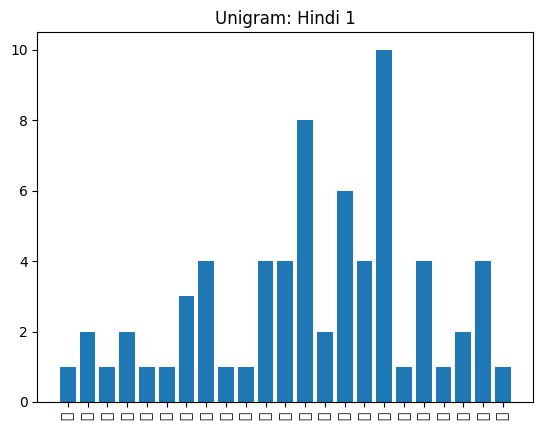

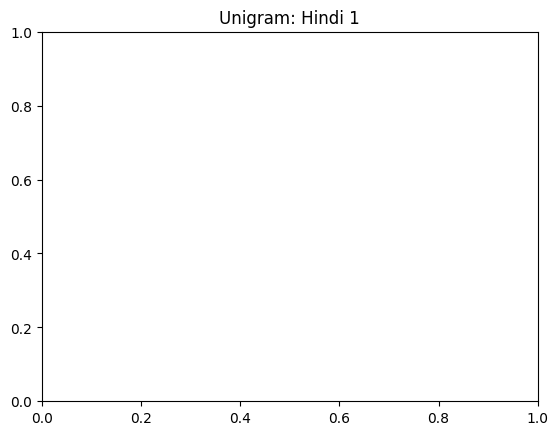

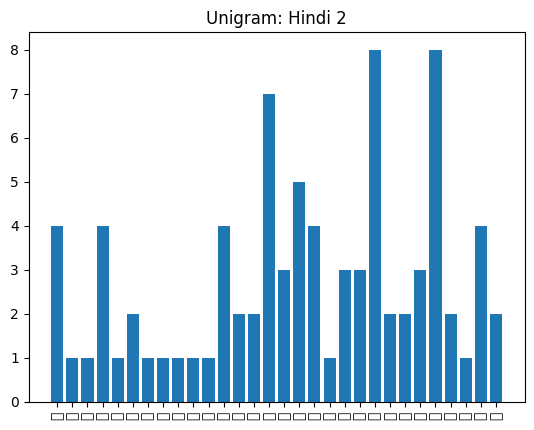

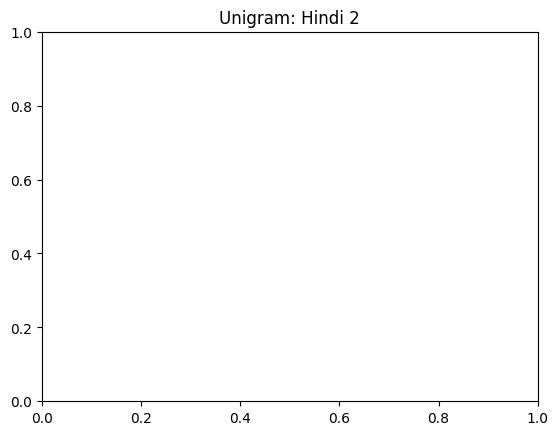

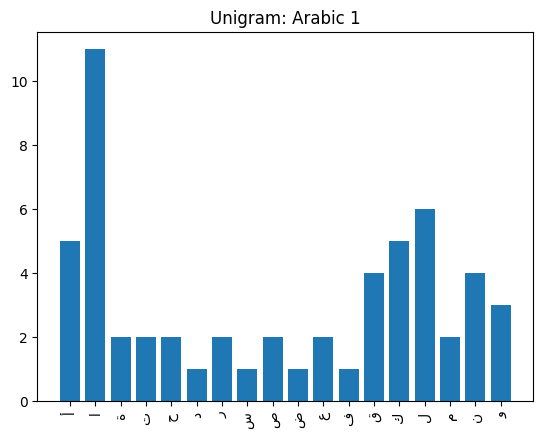

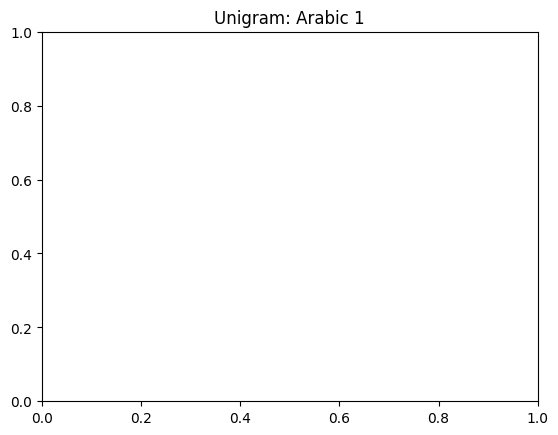

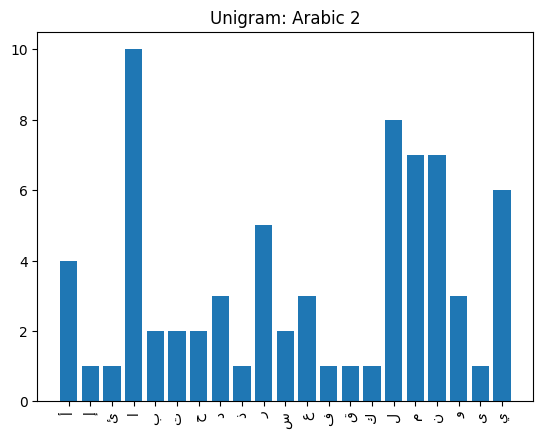

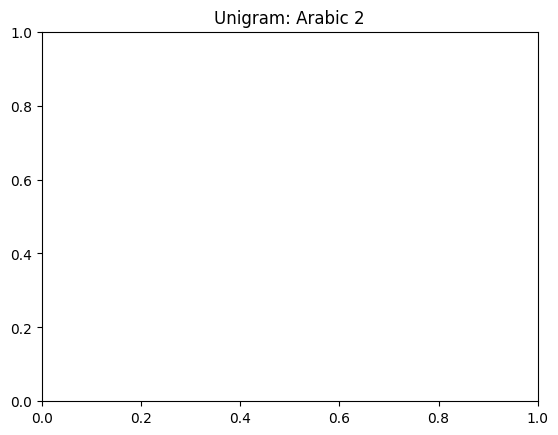

In [33]:
for text, title in texts_and_titles:
    unigram_counter = Counter(ngrams(text, 1))  # Generate unigrams
    plothistogram(unigram_counter, title)      # Plot the histogram
    plt.title(title)                           # Set the title
    plt.show()

We can see that the unigrams for French and English are very similar. So this is not a good feature if we want to distinguish between English and French. Let us look at bigrams.

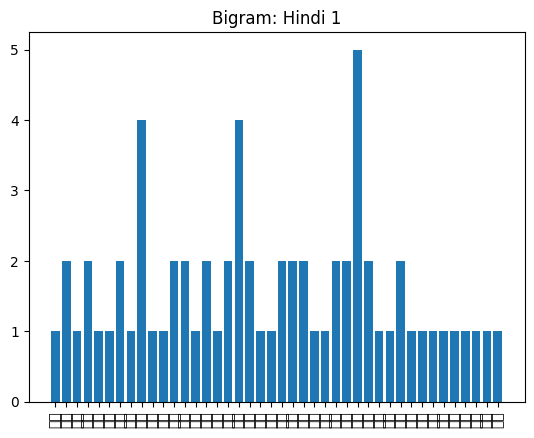

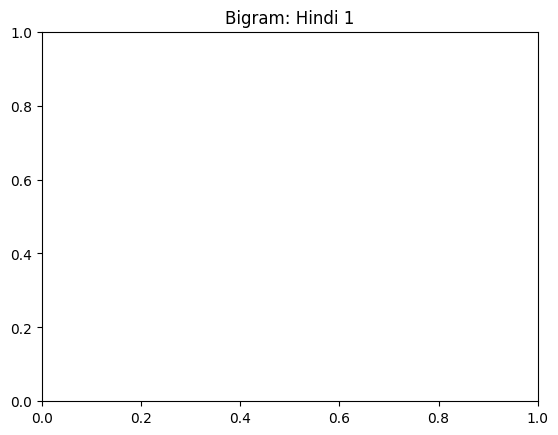

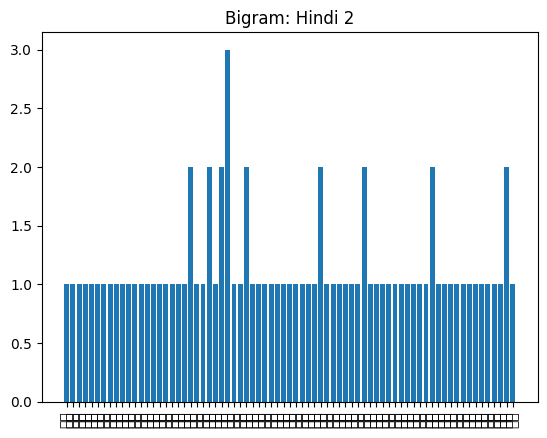

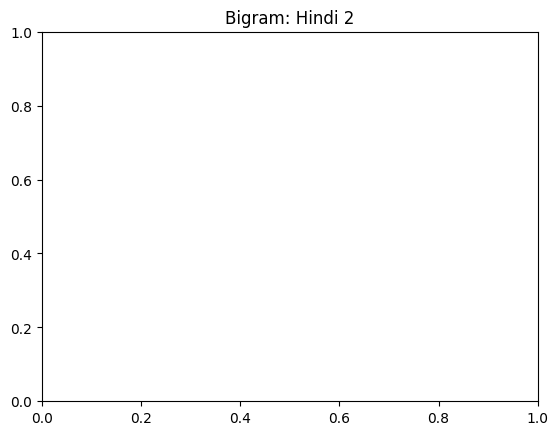

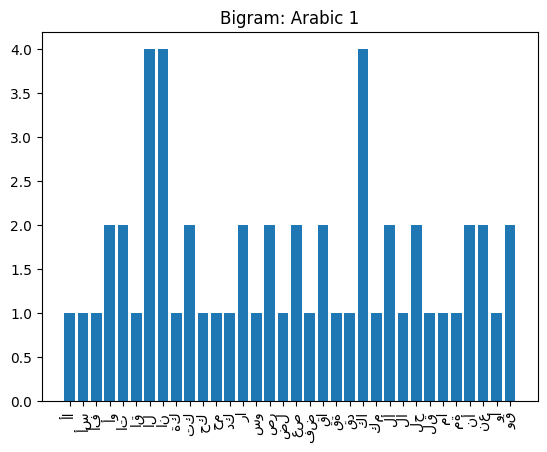

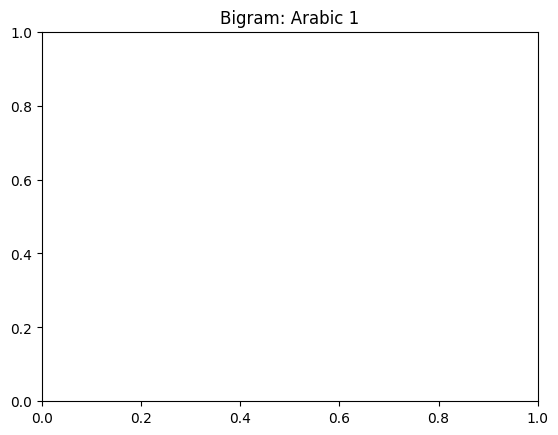

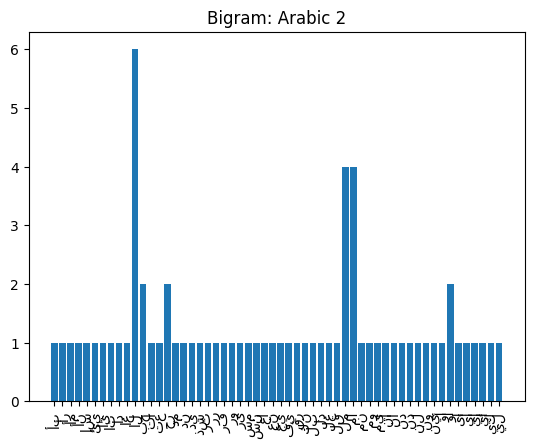

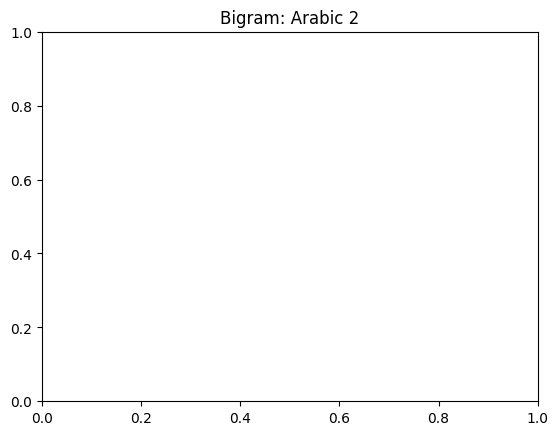

In [34]:
# Define a list of Hindi and Arabic texts with their titles
texts_and_titles = [
    (hindi1, "Bigram: Hindi 1"),
    (hindi2, "Bigram: Hindi 2"),
    (arabic1, "Bigram: Arabic 1"),
    (arabic2, "Bigram: Arabic 2")
]

# Analyze and plot bigrams for Hindi and Arabic texts
for text, title in texts_and_titles:
    bigram_counter = Counter(ngrams(text, 2))  # Generate bigrams
    plothistogram(bigram_counter, title)      # Plot the histogram
    plt.title(title)                          # Set the title
    plt.show()                                # Show the plot


Another way to visualize bigrams is to use a 2-dimensional graph.

In [39]:
def plotbihistogram(ngram, char_range, title):
    # Create a frequency matrix based on the given character range
    freq = np.zeros((len(char_range), len(char_range)))
    char_to_index = {char: idx for idx, char in enumerate(char_range)}

    for (char1, char2), count in ngram.items():
        if char1 in char_to_index and char2 in char_to_index:
            freq[char_to_index[char1], char_to_index[char2]] = count

    plt.imshow(freq, cmap='jet')
    plt.title(title)
    plt.colorbar()
    return freq

    # Define character ranges for Hindi and Arabic
hindi_chars = [chr(i) for i in range(0x0900, 0x097F)]  # Hindi Unicode range
arabic_chars = [chr(i) for i in range(0x0600, 0x06FF)]  # Arabic Unicode range

# Generate bigrams for Hindi and Arabic texts
bigram_hindi1 = Counter(ngrams(hindi1, 2))
bigram_hindi2 = Counter(ngrams(hindi2, 2))
bigram_arabic1 = Counter(ngrams(arabic1, 2))
bigram_arabic2 = Counter(ngrams(arabic2, 2))

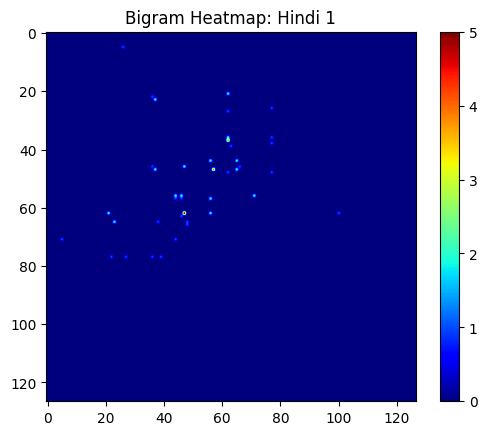

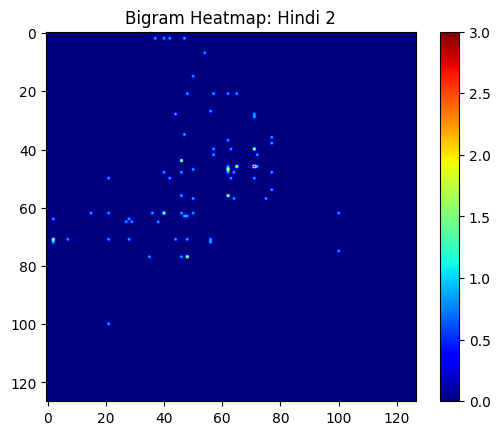

In [41]:
freq_hindi1 = plotbihistogram(bigram_hindi1, hindi_chars, "Bigram Heatmap: Hindi 1")
plt.show()
freq_hindi2 = plotbihistogram(bigram_hindi2, hindi_chars, "Bigram Heatmap: Hindi 2")
plt.show()


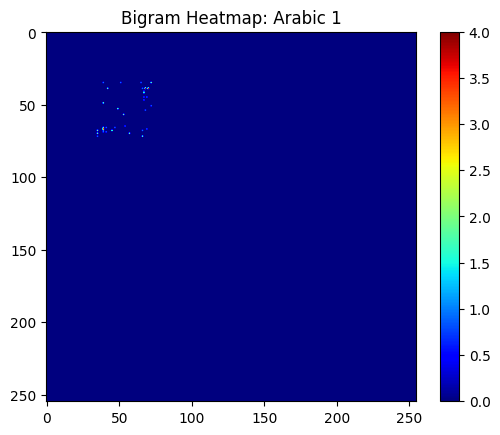

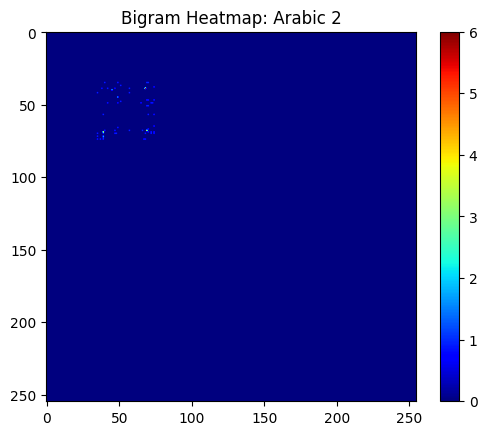

In [42]:
freq_arabic1 = plotbihistogram(bigram_arabic1, arabic_chars, "Bigram Heatmap: Arabic 1")
plt.show()
freq_arabic2 = plotbihistogram(bigram_arabic2, arabic_chars, "Bigram Heatmap: Arabic 2")
plt.show()

Let us look at the top 10 ngrams for each text.

In [43]:
def ind2tup(ind, char_range):
    """
    Converts a flattened index to a tuple of characters based on the character range.
    """
    ind = int(ind)
    n = len(char_range)
    i = int(ind / n)
    j = int(ind % n)
    return (char_range[i], char_range[j])

def ShowTopN(bifreq, char_range, n=10):
    """
    Displays the top N bigrams and their frequencies.
    """
    f = bifreq.flatten()
    arg = np.argsort(-f)  # Sort in descending order of frequency
    for ii in range(n):
        bigram = ind2tup(arg[ii], char_range)
        print(f'{bigram} : {f[arg[ii]]}')

# Define character ranges for Hindi and Arabic
hindi_chars = [chr(i) for i in range(0x0900, 0x097F)]  # Hindi Unicode range
arabic_chars = [chr(i) for i in range(0x0600, 0x06FF)]  # Arabic Unicode range

In [44]:
print('\nHindi 1:')
ShowTopN(freq_hindi1, hindi_chars)
print('\nHindi 2:')
ShowTopN(freq_hindi2, hindi_chars)
print('\nArabic 1:')
ShowTopN(freq_arabic1, arabic_chars)
print('\nArabic 2:')
ShowTopN(freq_arabic2, arabic_chars)


Hindi 1:
('ा', 'य') : 5.0
('य', 'ह') : 4.0
('थ', 'ा') : 4.0
('स', 'े') : 2.0
('क', 'ा') : 2.0
('ब', 'ु') : 2.0
('म', 'य') : 2.0
('ह', 'स') : 2.0
('ब', 'स') : 2.0
('ा', 'स') : 2.0

Hindi 2:
('म', 'े') : 3.0
('्', 'र') : 2.0
('े', 'ं') : 2.0
('न', 'े') : 2.0
('ा', 'न') : 2.0
('य', 'ा') : 2.0
('म', 'ु') : 2.0
('ब', 'म') : 2.0
('स', 'ा') : 2.0
('न', 'ि') : 1.0

Arabic 1:
('ك', 'ا') : 4.0
('ا', 'ن') : 4.0
('ا', 'ل') : 4.0
('ر', 'ا') : 2.0
('ا', 'ت') : 2.0
('ل', 'ح') : 2.0
('ل', 'أ') : 2.0
('و', 'ق') : 2.0
('ت', 'ك') : 2.0
('أ', 'و') : 2.0

Arabic 2:
('ا', 'ل') : 6.0
('م', 'ا') : 4.0
('ل', 'م') : 4.0
('و', 'ا') : 2.0
('ح', 'ر') : 2.0
('ب', 'ح') : 2.0
('د', 'ن') : 1.0
('ت', 'ع') : 1.0
('ا', 'ئ') : 1.0
('ر', 'ر') : 1.0


We observe that the bigrams are similar across different topics but different across languages. Thus, the bigram frequency is a good feature for distinguishing languages, but not for distinguishing topics.

Thus, we were able to convert a many-dimensional input (the text) to 26 dimesions (unigrams) or 26*26 dimensions (bigrams).


A few ways to explore:
1. Try with different languages.
2. The topics we used are quite similar, wikipedia articles of 'elephant' and 'giraffe'. What happens if we use very different topics? What if we use text from another source than Wikipedia?
3. How can we use and visualize trigrams and higher n-grams?

# Part 2: Written numbers

We will use a subset of the MNIST dataset. Each input character is represented in a 28*28 array. Let us see if we can extract some simple features from these images which can help us distinguish between the digits.

Load the dataset:

In [45]:
from keras.datasets import mnist

#loading the dataset
(train_X, train_y), (test_X, test_y) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Extract a subset of the data for our experiment:

In [46]:
no1 = train_X[train_y==1,:,:]
no0 = train_X[train_y==0,:,:]

Let us visualize a few images here:

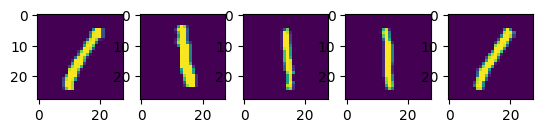

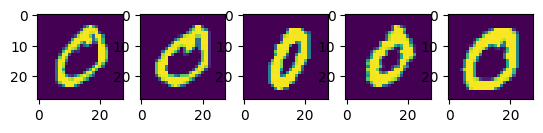

In [47]:
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no1[ii,:,:])
plt.show()
for ii in range(5):
  plt.subplot(1, 5, ii+1)
  plt.imshow(no0[ii,:,:])
plt.show()

suNow, let us start with a simple feature: the sum of all pixels and see how good this feature is.

In [48]:
sum1 = np.sum(no1>0, (1,2)) # threshold before adding up
sum0 = np.sum(no0>0, (1,2))

Let us visualize how good this feature is: (X-axis is mean, y-axis is the digit)

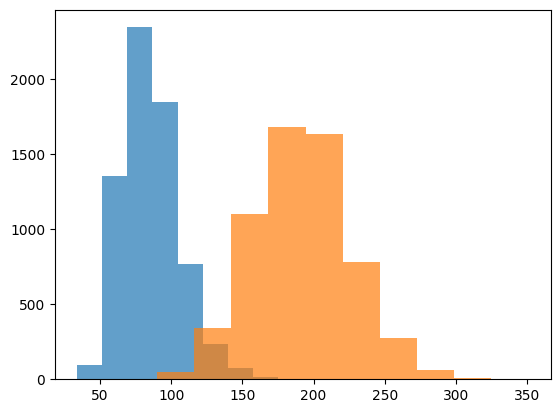

In [49]:
plt.hist(sum1, alpha=0.7);
plt.hist(sum0, alpha=0.7);

We can already see that this feature separates the two classes quite well.

Let us look at another, more complicated feature. We will count the number black pixels that are surrounded on four sides by non-black pixels, or "hole pixels".

In [50]:
def cumArray(img):
  img2 = img.copy()
  for ii in range(1, img2.shape[1]):
    img2[ii,:] = img2[ii,:] + img2[ii-1,:]  # for every row, add up all the rows above it.
  img2 = img2>0
  return img2

def getHolePixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  hole = hull & ~ (img>0) # remove the original digit to leave behind the holes
  return hole

Visualize a few:

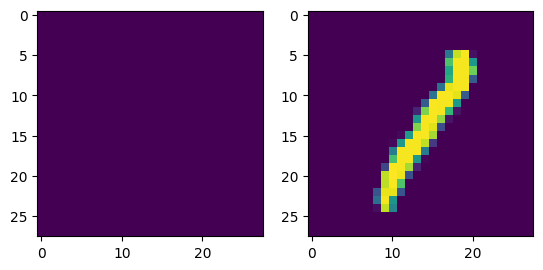

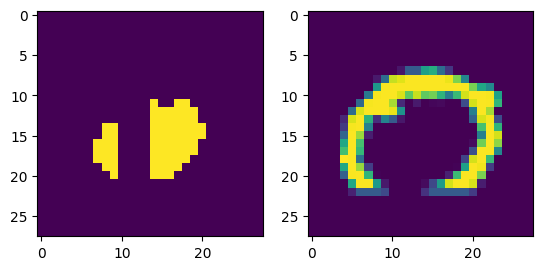

In [51]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHolePixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Now let us plot the number of hole pixels and see how this feature behaves

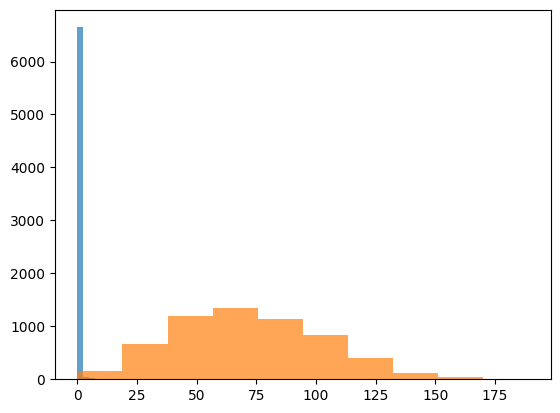

In [52]:
hole1 = np.array([getHolePixels(i).sum() for i in no1])
hole0 = np.array([getHolePixels(i).sum() for i in no0])

plt.hist(hole1, alpha=0.7);
plt.hist(hole0, alpha=0.7);

This feature works even better to distinguish between one and zero.


Now let us try the number of pixels in the 'hull' or the number with the holes filled in:

In [53]:
def getHullPixels(img):
  im1 = cumArray(img)
  im2 = np.rot90(cumArray(np.rot90(img)), 3) # rotate and cumulate it again for differnt direction
  im3 = np.rot90(cumArray(np.rot90(img, 2)), 2)
  im4 = np.rot90(cumArray(np.rot90(img, 3)), 1)
  hull =  im1 & im2 & im3 & im4 # this will create a binary image with all the holes filled in.
  return hull

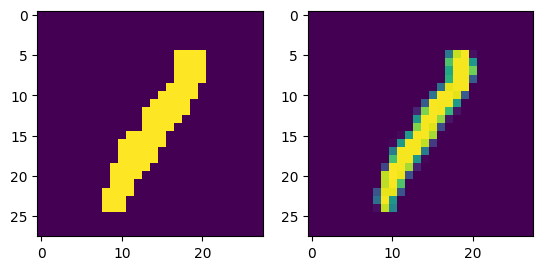

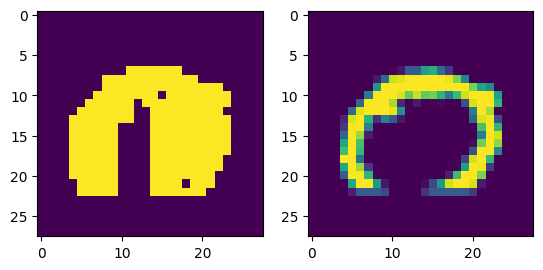

In [54]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getHullPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

Plotting the number of hull pixels versus the digit:

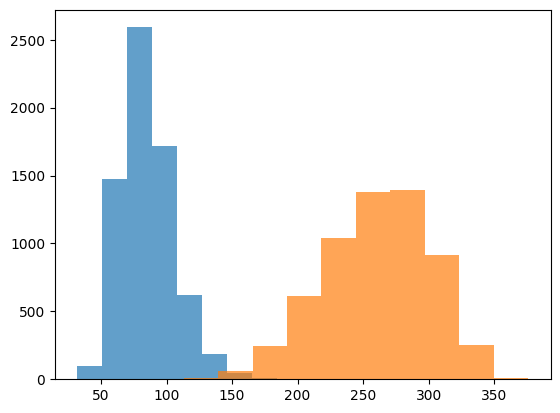

In [55]:
hull1 = np.array([getHullPixels(i).sum() for i in no1])
hull0 = np.array([getHullPixels(i).sum() for i in no0])

plt.hist(hull1, alpha=0.7);
plt.hist(hull0, alpha=0.7);

Let us try one more feature, where we look at the number of boundary pixels in each image.

In [58]:
def minus(a, b):
  return a & ~ b

def getBoundaryPixels(img):
  img = img.copy()>0  # binarize the image
  rshift = np.roll(img, 1, 1)
  lshift = np.roll(img, -1 ,1)
  ushift = np.roll(img, -1, 0)
  dshift = np.roll(img, 1, 0)
  boundary = minus(img, rshift) | minus(img, lshift) | minus(img, ushift) | minus(img, dshift)
  return boundary

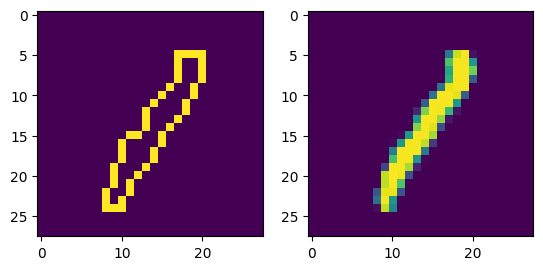

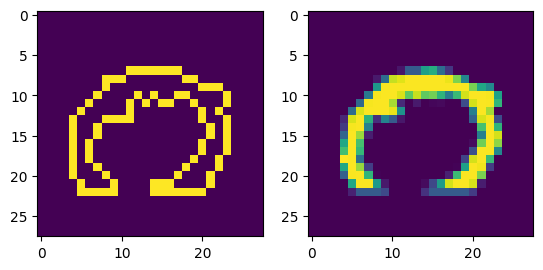

In [59]:
imgs = [no1[456,:,:],  no0[456,:,:]]
for img in imgs:
  plt.subplot(1,2,1)
  plt.imshow(getBoundaryPixels(img))
  plt.subplot(1,2,2)
  plt.imshow(img)
  plt.show()

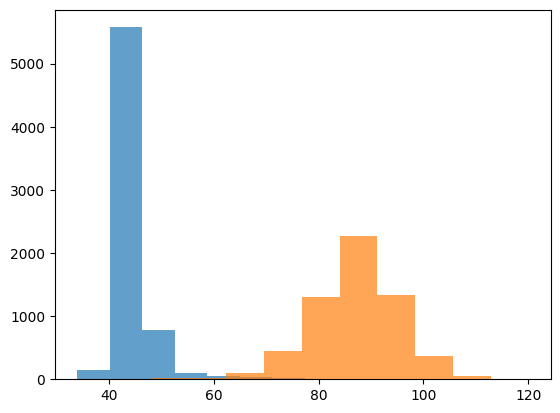

In [60]:
bound1 = np.array([getBoundaryPixels(i).sum() for i in no1])
bound0= np.array([getBoundaryPixels(i).sum() for i in no0])

plt.hist(bound1, alpha=0.7);
plt.hist(bound0, alpha=0.7);

What will happen if we plot two features together?

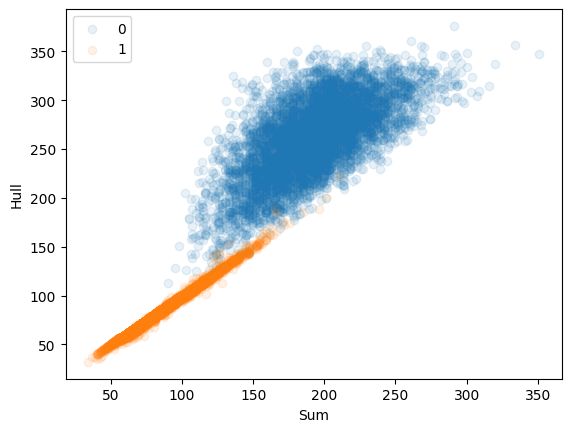

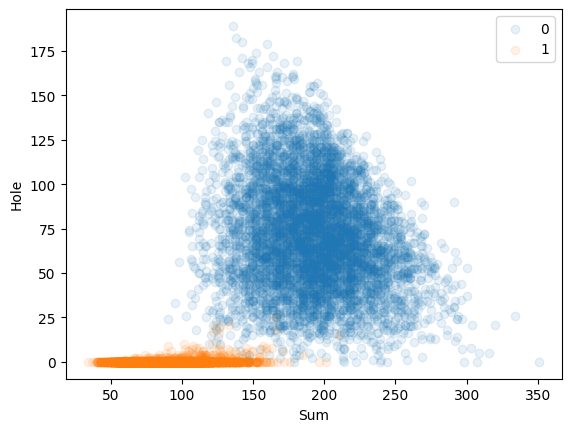

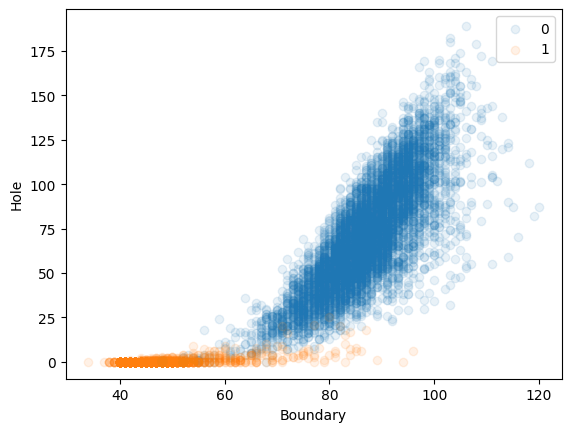

In [61]:
# Sum and hull
plt.scatter(sum0, hull0, alpha=0.1)
plt.scatter(sum1, hull1, alpha=0.1)
plt.xlabel('Sum')
plt.ylabel('Hull')
plt.legend(['0','1'])
plt.show()

# Sum and hole
plt.scatter(sum0, hole0, alpha=0.1)
plt.scatter(sum1, hole1, alpha=0.1)
plt.xlabel('Sum');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

# Hole and boundary
plt.scatter(bound0, hole0, alpha=0.1)
plt.scatter(bound1, hole1, alpha=0.1)
plt.xlabel('Boundary');
plt.ylabel('Hole');
plt.legend(['0','1'])
plt.show()

Now let us try plotting 3 features together.

In [63]:
cl1 = ['class 1']*len(sum1)
cl0 = ['class 0']*len(sum0)
df = pd.DataFrame(list(zip(np.concatenate((hole0, hole0)), np.concatenate((sum1,sum0)),
                           np.concatenate((bound1,bound0)), np.concatenate((cl1, cl0)))),
               columns =['Hole', 'Sum', 'Boundary', 'Class'])
df.head()
fig = px.scatter_3d(df, x='Hole', y='Sum', z='Boundary', color='Class', opacity=0.1)
fig.show()

Feel free to explore the above graph with your mouse.


We have seen that we extracted four features from a 28*28 dimensional image.


Some questions to explore:
1. Which is the best combination of features?
2. How would you test or visualize four or more features?
3. Can you come up with your own features?
4. Will these features work for different classes other than 0 and 1?
5. What will happen if we take more that two classes at a time?